Madhumita, Roy
Student Number-20193689
Master in Management Analytics
021W
MMA869
August 16,2020

In [2]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report,confusion_matrix,make_scorer,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Q7,2a

In [4]:
#Reading the csv file
df = pd.read_csv("OJ.csv",header = 0,index_col=0)

In [5]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [6]:
# Checking for missing data
pd.DataFrame(df).isna().sum()

Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

In [7]:
#Checking for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

# Data Exploration and Feature Selection

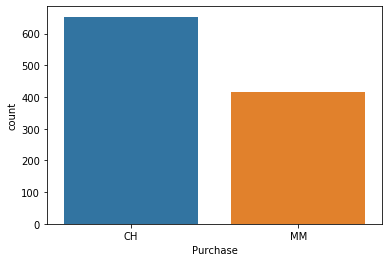

In [8]:
# Looking at the Purchase Count
sns.countplot(x="Purchase",data=df)

CH has more customers than MM. So when changing Purchase to binary, CH will be 1 and MM will be 0

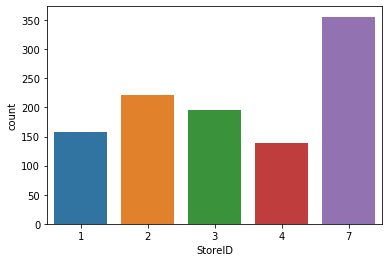

In [9]:
# Looking at different store ID's
sns.countplot(x="StoreID",data=df)

In [10]:
#Changing Purchase, Store7 to binary
df["Purchase"] = np.where(df["Purchase"]=="CH",1,0)
df["Store7"] = np.where(df["Store7"]=="Yes",1,0)
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
2,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
3,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
4,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
5,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


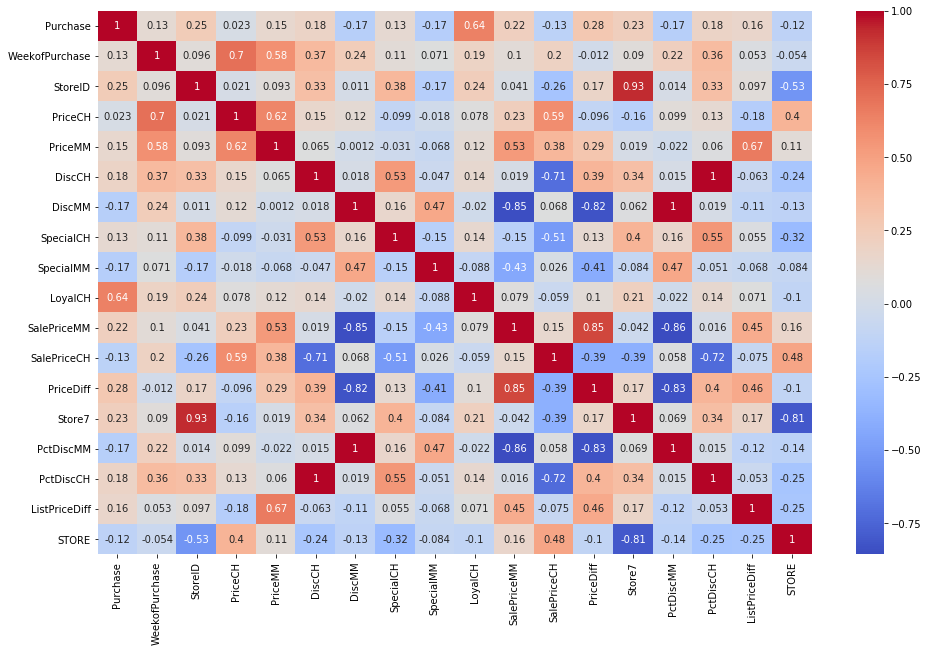

In [11]:
# Heatplot to see the correlation between different features
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Highly correlated features will be removed

In [12]:
# Changing to categorical dtype. The binary variables have to be changed to category dtype 
df['StoreID'] = df['StoreID'].astype('category')
df['Store7'] = df['Store7'].astype('category')
df['STORE'] = df['STORE'].astype('category')
df["SpecialCH"] = df['SpecialCH'].astype('category')
df["SpecialMM"] = df['SpecialMM'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Purchase        1070 non-null   int32   
 1   WeekofPurchase  1070 non-null   int64   
 2   StoreID         1070 non-null   category
 3   PriceCH         1070 non-null   float64 
 4   PriceMM         1070 non-null   float64 
 5   DiscCH          1070 non-null   float64 
 6   DiscMM          1070 non-null   float64 
 7   SpecialCH       1070 non-null   category
 8   SpecialMM       1070 non-null   category
 9   LoyalCH         1070 non-null   float64 
 10  SalePriceMM     1070 non-null   float64 
 11  SalePriceCH     1070 non-null   float64 
 12  PriceDiff       1070 non-null   float64 
 13  Store7          1070 non-null   category
 14  PctDiscMM       1070 non-null   float64 
 15  PctDiscCH       1070 non-null   float64 
 16  ListPriceDiff   1070 non-null   float64 
 17  STORE         

In [13]:
#Looking at all the features
df.columns

Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')

In [14]:
#Highly correlated features and duplicate features will be removed
#Highly correlated features and duplicate features will be removed. 
#Store7 and Store are highly correlated with Store ID. So they are removed.
#Price diff is the difference between Sale prices of the juices. Listpricediff is the difference between juice sale prices
#To avoid duplication, pricediff and Listpricediff features are removed
#Discount features and percentdiscount features are also removed to avoid duplication
df.drop(["Store7","DiscMM","DiscCH","WeekofPurchase","ListPriceDiff","PriceDiff","PctDiscMM","PctDiscCH","STORE"],axis=1,inplace=True)

In [15]:
#0ne hot encoding
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','int32','float64']).columns, drop_first = True)
df.head()

,Purchase,PriceCH,PriceMM,LoyalCH,SalePriceMM,SalePriceCH,StoreID_2,StoreID_3,StoreID_4,StoreID_7,SpecialCH_1,SpecialMM_1
1,1,1.75,1.99,0.500000,1.99,1.75,0,0,0,0,0,0
2,1,1.75,1.99,0.600000,1.69,1.75,0,0,0,0,0,1
3,1,1.86,2.09,0.680000,2.09,1.69,0,0,0,0,0,0
4,0,1.69,1.69,0.400000,1.69,1.69,0,0,0,0,0,0
5,1,1.69,1.69,0.956535,1.69,1.69,0,0,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Purchase     1070 non-null   int32  
 1   PriceCH      1070 non-null   float64
 2   PriceMM      1070 non-null   float64
 3   LoyalCH      1070 non-null   float64
 4   SalePriceMM  1070 non-null   float64
 5   SalePriceCH  1070 non-null   float64
 6   StoreID_2    1070 non-null   uint8  
 7   StoreID_3    1070 non-null   uint8  
 8   StoreID_4    1070 non-null   uint8  
 9   StoreID_7    1070 non-null   uint8  
 10  SpecialCH_1  1070 non-null   uint8  
 11  SpecialMM_1  1070 non-null   uint8  
dtypes: float64(5), int32(1), uint8(6)
memory usage: 100.6 KB


# Predictive Modeling

# Q7, 2b

In [17]:
#The target variable Purchase will be y and the other features will be X
y = df['Purchase']
X = df.drop(columns = 'Purchase')

In [18]:
# The data is now split into train and test in 80:20 ratio.
# The train set will be used to create and train the model while the test data set will be used to validate the model.
#A random seed is selected so that the train and test sets remains constant everytime we split the data.

np.random.seed(77300)
# split the data randomly into 80% train and 20% test samples 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,stratify=y)

# Lets check the results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 11)
(214, 11)
(856,)
(214,)


In [19]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [20]:
# F1 Score
def F1_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    recall = (tp/(tp+fn))
    precision = (tp/(tp+fp))
    return (2*recall*precision)/(recall+precision)

In [21]:
# Keeping threshold as 0.5 as there is 50% probability that a person will buy MM or CH
class_threshold = 0.5

# Model No 1: Decision Tree

# Q7, 2c

In [21]:
# Define a CART model and call it classifier_DT
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 8, random_state=77300) # random_state -- is same as random seed, neede to get the same result every time we rerun

# Train the model classifier_DT on the training data
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=77300, splitter='best')

In [22]:
#  Use the trained model to predict testing data
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

CART tree with 8 leafs


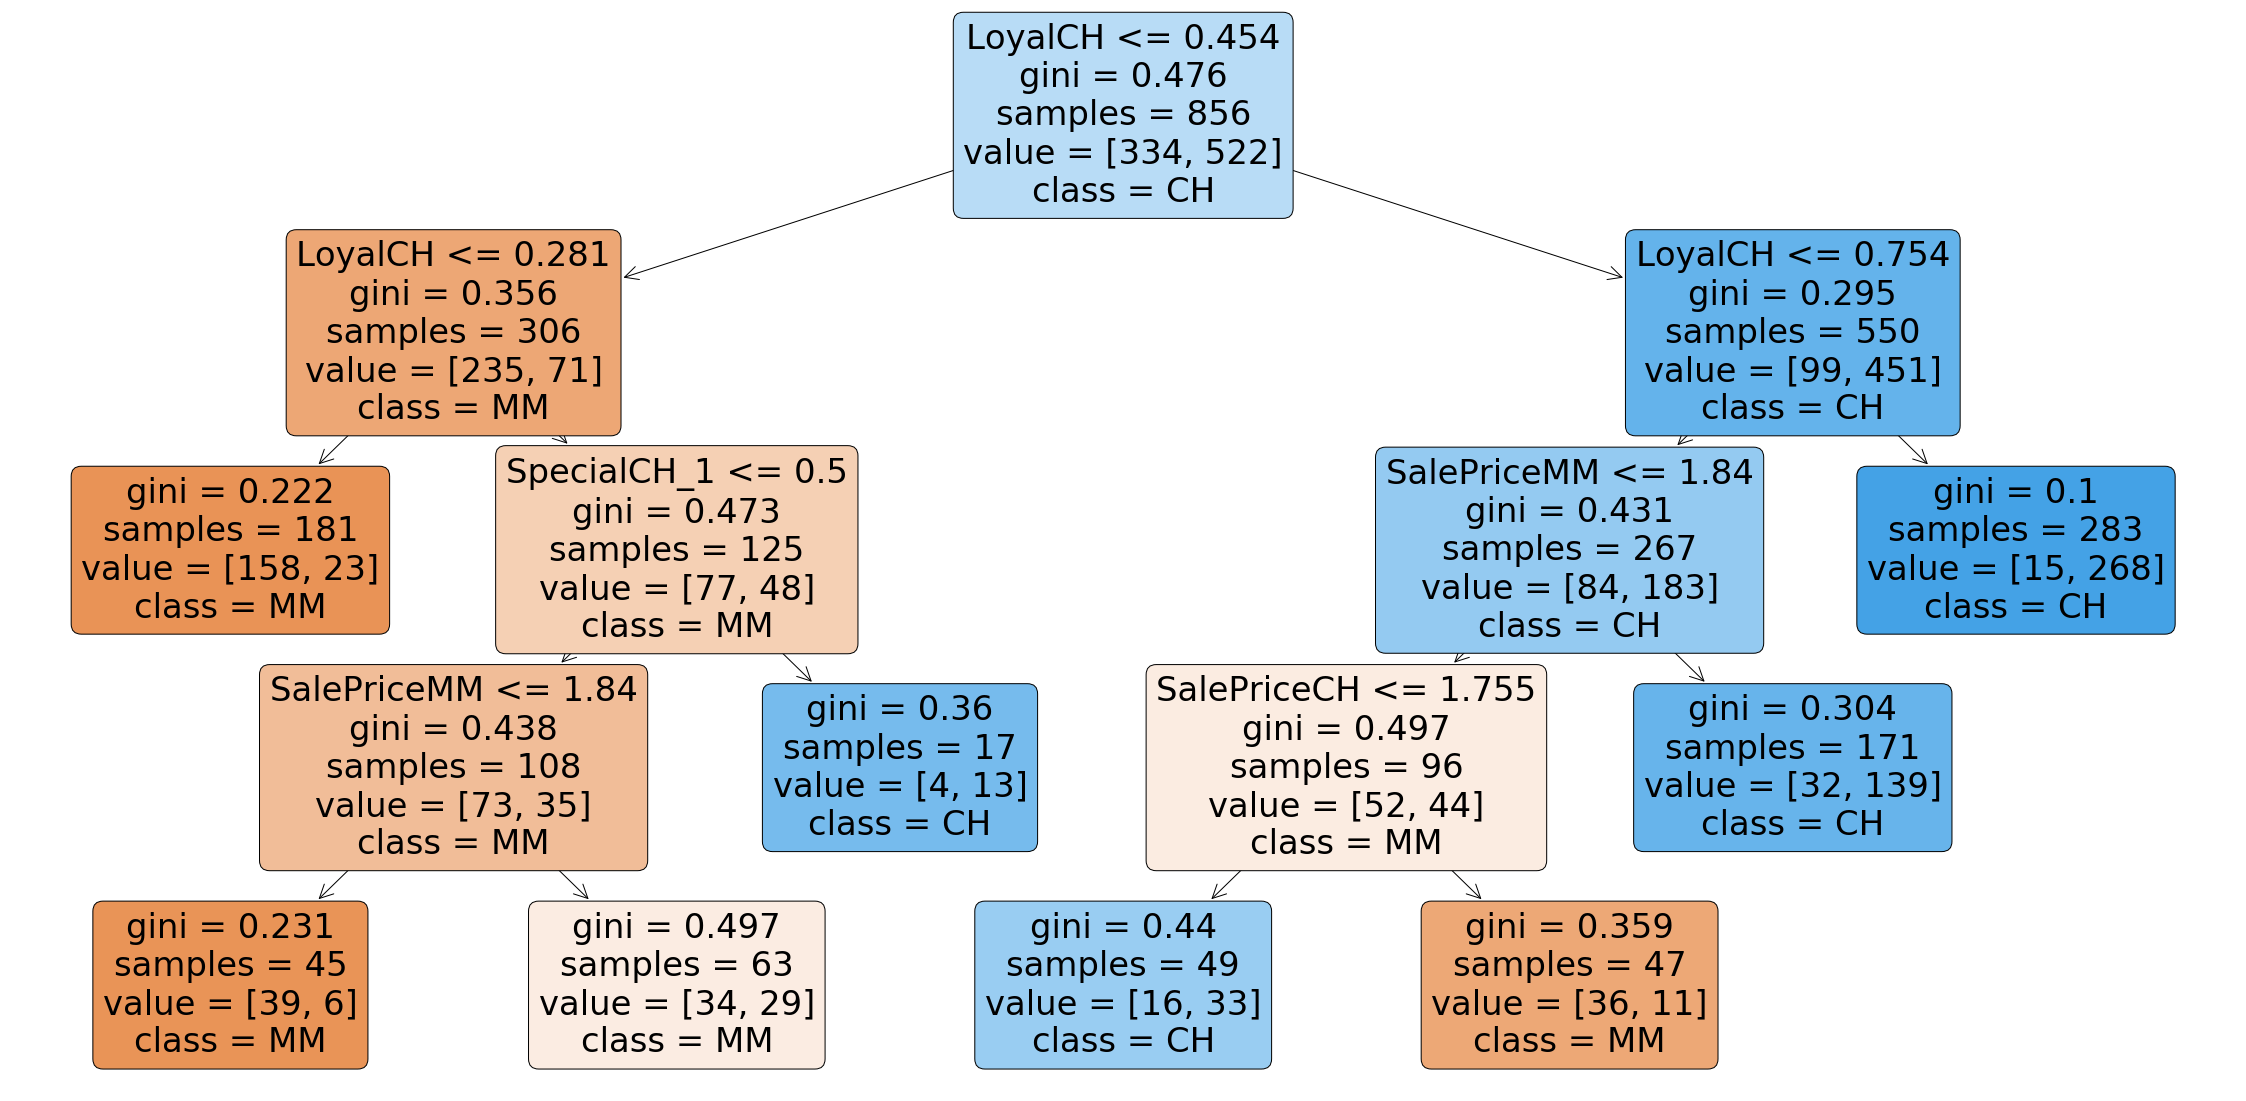

In [23]:
# Visualizing the resultant tree

from sklearn import tree

plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True, 
               class_names = ['MM', 'CH'], rounded = True)
print('CART tree with 8 leafs')

Metrics of the CART model: 

Confusion matrix: 
[[ 67  18]
 [ 16 113]]
                                   Accuracy: 0.8411214953271028
                   SENSITIVITY (aka RECALL): 0.8625954198473282
                 SPECIFICITY (aka FALL-OUT): 0.8072289156626506
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.875968992248062
                 NEGATIVE PREDICTIVE VALUE): 0.788235294117647
                                  F1 Score): 0.8692307692307693


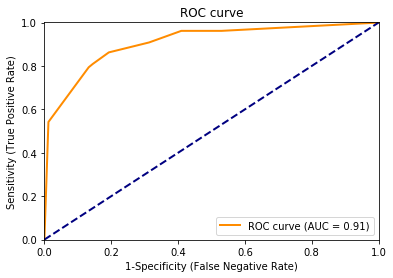

 AUC: 0.9072932953186793


In [24]:
# Lets look at the model metrics

print('Metrics of the CART model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
print("                                  F1 Score): " + str(F1_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

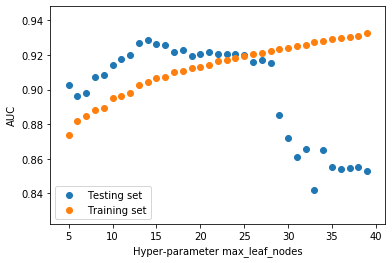

In [25]:
# Tuning hyper-parameter max_leaf_nodes

n_max_leaf_nodes = range(5,40) # Lets train the models with 5, 6, 7, ... 40 leafs

# for each model calculate AUC for testing 
array = []
for n in n_max_leaf_nodes:
    
    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]   
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_test, y_pred_prob)])

# plot the testing set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# now for each model calculate AUC on training 
array = []
for n in n_max_leaf_nodes:

    classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
    classifier_DT = classifier_DT.fit(X_train, y_train)
    
    y_pred_prob = classifier_DT.predict_proba(X_train)[:,1] 
    y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

    array.append([n,roc_auc_score(y_train, y_pred_prob)])

# plot the training set AUCs
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

# label the axes on the plot
plt.xlabel('Hyper-parameter max_leaf_nodes')
plt.ylabel('AUC')

# add the legend
plt.legend(['Testing set','Training set'])


The optimal number of leaves is 25

In [44]:
# lets train the model with 25 leafs
classifier_DT = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 25)
classifier_DT = classifier_DT.fit(X_train, y_train)

# obtain its predictions
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]   
y_pred = np.where(y_pred_prob > class_threshold, 1, 0)

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("F1 Score: " + str(F1_score(y_test, y_pred)))


# calclate and print the AUC
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


Confusion matrix: 
[[ 63  13]
 [ 20 118]]
F1 Score: 0.8773234200743495
 AUC: 0.9200772555872344
 AUC: 0.8298997516784696


CART tree with 25 leafs


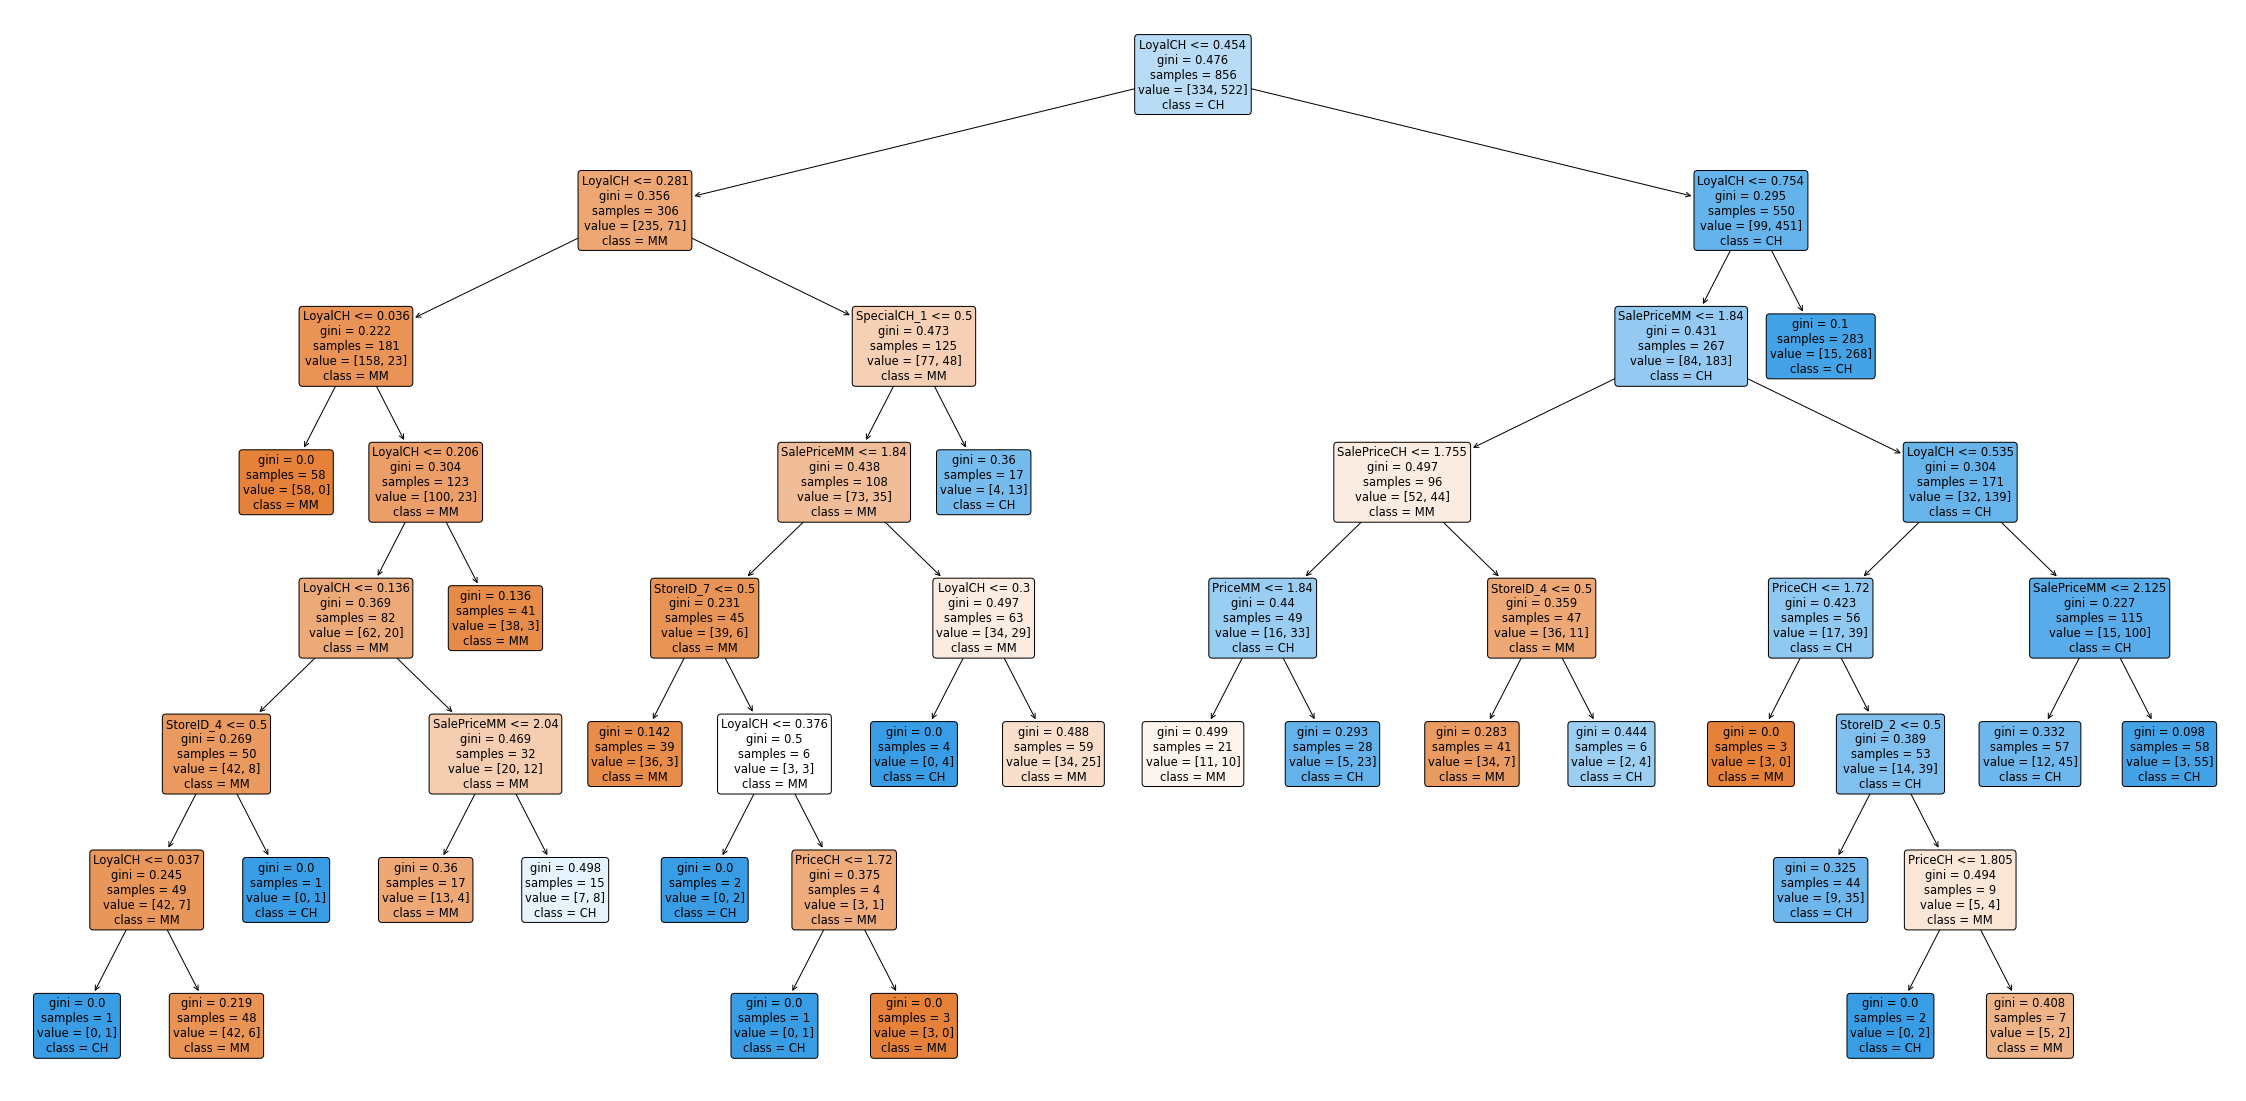

In [30]:
plt.figure(figsize=(40,20))
tree.plot_tree(classifier_DT.fit(X_train, y_train), feature_names = X_train.columns, filled = True, 
               class_names = ['MM', 'CH'], rounded = True)
print('CART tree with 25 leafs')

# Model No 2: Random Forest

In [31]:
# Define a random forest model and call it classifier_RF
classifier_RF = RandomForestClassifier(random_state=77300) # recall what random_state mean

# Train the model classifier_RF on the training data
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=77300,
                       verbose=0, warm_start=False)

Metrics of the Random Forest model: 

Confusion matrix: 
[[ 61  19]
 [ 22 112]]
                                   Accuracy: 0.8084112149532711
                   SENSITIVITY (aka RECALL): 0.8549618320610687
                 SPECIFICITY (aka FALL-OUT): 0.7349397590361446
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.835820895522388
                 NEGATIVE PREDICTIVE VALUE): 0.7625
                                  F1 Score): 0.8452830188679246


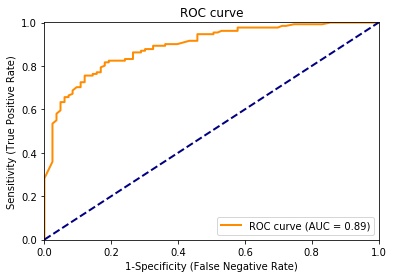

 AUC: 0.8911064103743217


In [32]:
# Use the trained model to predict testing data
y_pred_prob = classifier_RF.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
print("                                  F1 Score): " + str(F1_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


Optimized hyper-parameters:{'max_depth': 6, 'max_leaf_nodes': None, 'n_estimators': 100}
Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": 

Confusion matrix: 
[[ 65  14]
 [ 18 117]]
                                   Accuracy: 0.8504672897196262
                   SENSITIVITY (aka RECALL): 0.8931297709923665
                 SPECIFICITY (aka FALL-OUT): 0.7831325301204819
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8666666666666667
                 NEGATIVE PREDICTIVE VALUE): 0.8227848101265823
                                  F1 Score): 0.8796992481203009


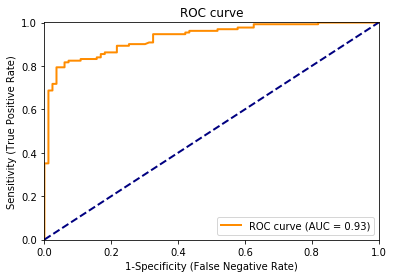

 AUC: 0.9305159569576014


In [34]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

n_trees = [100, 200, 300, 400, 500, 600]
depth = [None,2, 3, 4, 5, 6]
leaf_nodes = [None,5, 10, 50, 100]
#samples_split = [2, 10, 50]
Grid_srch_parameters_list = [ [{'n_estimators':n_trees,'max_depth':depth,'max_leaf_nodes':leaf_nodes}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_RF, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# apply function grid_search to the training data, call the resultand best model grid_search_RF
grid_search_RF = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data
y_pred_prob = grid_search_RF.predict_proba(X_test)[:,1] # probabilities  
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))
    
# Lets look at the model metrics

print('Metrics of the Random Forest model with the optimized hyper-parameter for the "number of trees": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
print("                                  F1 Score): " + str(F1_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

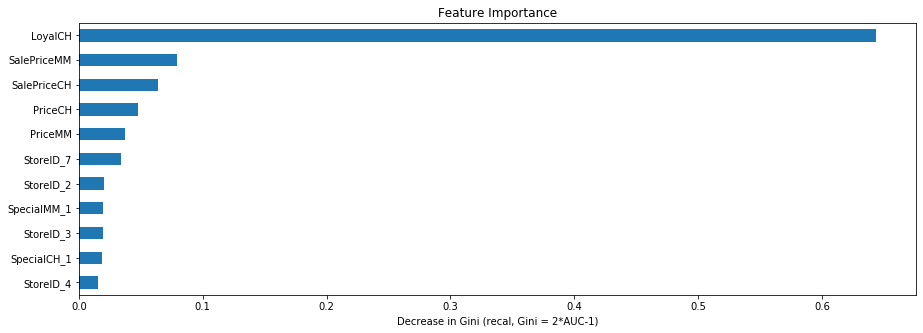

In [37]:
# Tree models do not have coefficients, but have easily-interpretable tree plots
# But in tree ensembles (such as random forect) there is no point to look at individual trees

# Useful intuition, however, can be obtained from the Feature Importance Plots

# calculate feature importances
importances = grid_search_RF.best_estimator_.feature_importances_ 

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

# Model No 3: XgBoost

In [38]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

# A gradient boosting model has many hyper-parameters, for example::
# -- the number of trees in the forest ensemble, 
# -- speed of boosting ("learning rate", "decay rate"), 
# -- max number of leafs on each tree, 
# -- min number of datapoints at a leaf
# and so on

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=77300, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[ 66  16]
 [ 17 115]]
                                   Accuracy: 0.8457943925233645
                   SENSITIVITY (aka RECALL): 0.8778625954198473
                 SPECIFICITY (aka FALL-OUT): 0.7951807228915663
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8712121212121212
                 NEGATIVE PREDICTIVE VALUE): 0.8048780487804879
                                  F1 Score): 0.8745247148288973


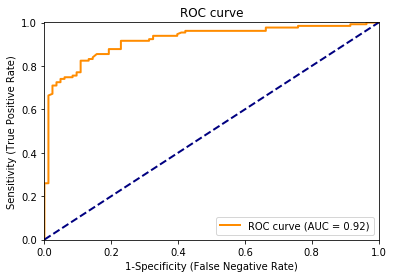

 AUC: 0.9198933137128668


In [39]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities 
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
print("                                  F1 Score): " + str(F1_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Optimized hyper-parameters:{'learning_rate': 0.01, 'max_depth': 4, 'max_leaf_nodes': 5, 'n_estimators': 600}
Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": 

Confusion matrix: 
[[ 67  16]
 [ 16 115]]
                                   Accuracy: 0.8504672897196262
                   SENSITIVITY (aka RECALL): 0.8778625954198473
                 SPECIFICITY (aka FALL-OUT): 0.8072289156626506
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8778625954198473
                 NEGATIVE PREDICTIVE VALUE): 0.8072289156626506
                                  F1 Score): 0.8778625954198473


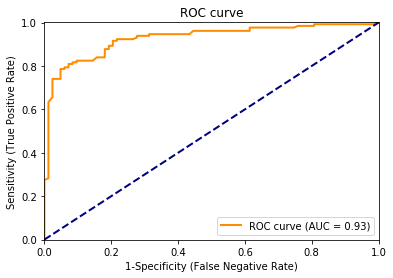

 AUC: 0.9275269014991263


In [41]:
# Hyper-parameter tuning ("optimization") using the function GridSearchCV for maximizing AUC
score_func = make_scorer(roc_auc_score, greater_is_better=True)

# as an example, we will tune two parameters
n_trees = [100, 200, 300, 400, 500, 600] # first, the "numeber of trees" hyper-parameter (n_trees) and we will consider values of 100, 200, ... 600 trees in the forest
learning_rates = [0.01, 0.1] # second, speed of boosting ("learning rate") and we will use two values 0.01 и 0.1
depth = [2, 3, 4, 5, 6]
leaf_nodes = [None,5, 10, 50, 100]

Grid_srch_parameters_list = [ [{'n_estimators':n_trees, 'learning_rate': learning_rates,
                                'max_depth':depth,'max_leaf_nodes':leaf_nodes}] ] 

# we will apply a 5-fold cross-validation and call the resultant function "grid_search"
grid_search = GridSearchCV(estimator = classifier_GBM, cv = 5, param_grid = Grid_srch_parameters_list[0], scoring = score_func,
                              return_train_score = True) 

# # apply function grid_search to the training data, call the resultant best model grid_search_GBM
grid_search_GBM = grid_search.fit(X_train, y_train)

# use the best model to predict the testing data 
y_pred_prob = grid_search_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

print('Optimized hyper-parameters:' + str(grid_search.best_params_))

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model with the optimized hyper-parameters": \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
print("                                  F1 Score): " + str(F1_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


# Model No 4: Logistic Regression

In [22]:
# define the model and call it classifier_LR
classifier_LR = LogisticRegression()

# train classifier_LR on the training data
classifier_LR.fit(X_train, y_train)

# This is a regression, so it has coefficients -- lets see them
# Note, there is no easy way to show significance, etc. with sklearn
print('Intercept: ' + str(classifier_LR.intercept_))
print('Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: ')
summary = pd.DataFrame([X_test.columns,classifier_LR.coef_[0]]).transpose().sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
top10positive = summary.head(10) # 10 largest (by value)
top10negative = summary.tail(10) # 10 smallest (by value)
top10list=pd.DataFrame()
top10list= top10list.append(pd.DataFrame(data = top10positive))
top10list= top10list.append(pd.DataFrame(data = top10negative))
top10list

Intercept: [-2.80505776]
Coefficients (10 largest and 10 smallest) [recall, there are 252 of them, in total: 


,Variable,Coefficient
2,LoyalCH,4.91468
3,SalePriceMM,1.89607
8,StoreID_7,0.557138
1,PriceMM,0.401422
7,StoreID_4,0.172348
9,SpecialCH_1,0.111851
6,StoreID_3,-0.146907
10,SpecialMM_1,-0.253761
5,StoreID_2,-0.324172
0,PriceCH,-0.34473


In [27]:
# Use the trained model to predict testing data

y_pred_prob = classifier_LR.predict_proba(X_test)[:,1] # probabilities

# Select the threshold value -- we will use Т=0.6073. Why? Why not 50%? Because 60.73% -- is the average probability of retention in our data (1451 "1"s out of 2389 datapoints) 
class_threshold = 0.5

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # applying the threshold rule to classify



Metrics of the logistic regression model: 

Confusion matrix: 
[[ 67  13]
 [ 16 118]]
                                   Accuracy: 0.8644859813084113
                   SENSITIVITY (aka RECALL): 0.9007633587786259
                 SPECIFICITY (aka FALL-OUT): 0.8072289156626506
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8805970149253731
                 NEGATIVE PREDICTIVE VALUE): 0.8375


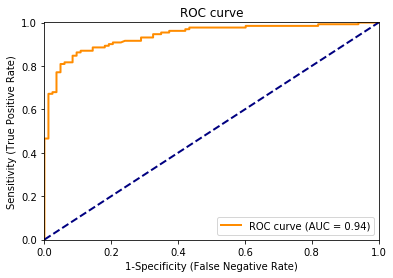

 AUC: 0.9389772831785156


In [28]:
# Lets look at the model metrics 
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [30]:
# Apply variable selection with Stepwise Recursive Feature Selection 

from sklearn.feature_selection import RFE

rfe = RFE(estimator=classifier_LR, n_features_to_select=20, step=1) # in this example we will select 20 variables; this number "20" is a hyperparameter to tune
rfe.fit(X_train, y_train)
ranking = rfe.ranking_.reshape(len(X_train.columns))

# which 5 variables are in the model?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head()


,0,1
0,PriceCH,1
1,PriceMM,1
2,LoyalCH,1
3,SalePriceMM,1
4,SalePriceCH,1


Metrics of the logistic regression model after variable selection: 

Confusion matrix: 
[[ 67  13]
 [ 16 118]]
                                   Accuracy: 0.8644859813084113
                   SENSITIVITY (aka RECALL): 0.9007633587786259
                 SPECIFICITY (aka FALL-OUT): 0.8072289156626506
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8805970149253731
                 NEGATIVE PREDICTIVE VALUE): 0.8375


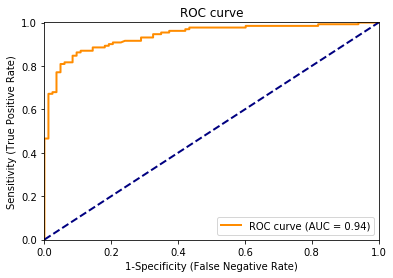

 AUC: 0.9389772831785156


In [31]:
# Train the model and call it classifier_LR_RFE 
classifier_LR_RFE = rfe.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier_LR_RFE.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification


# Lets look at the model metrics after variable selection 
print('Metrics of the logistic regression model after variable selection: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))


In this case AUC for logistic regression and step wise logistic regression is same. This maybe due to the less features in the data

# Model No 5: Support Vector Machines

In [32]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('standardize', StandardScaler())) # scale the data
svm_estimators.append(('svm', svm.SVC(probability=True))) # define SVM with probabilities (recall, SVM be default does not predict probabilities)
     
# Define the support vectors machine model and call it classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Train the model classifier_SVM on the training data
Classifier_SVM.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Metrics of the Support Vector Machines model: 

Confusion matrix: 
[[ 61  14]
 [ 22 117]]
                                   Accuracy: 0.8317757009345794
                   SENSITIVITY (aka RECALL): 0.8931297709923665
                 SPECIFICITY (aka FALL-OUT): 0.7349397590361446
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.841726618705036
                 NEGATIVE PREDICTIVE VALUE): 0.8133333333333334


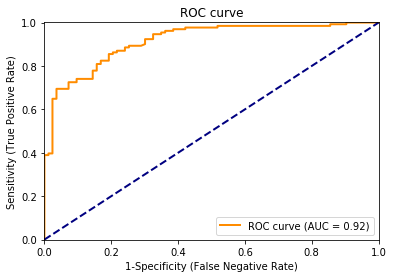

 AUC: 0.9153407523222662


In [33]:
# use the fitted model to predict the testing data 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Support Vector Machines model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))